#### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.shape
# rows = 4746, cols = 12

(4746, 12)

### Data preprocessing


#### 1) Create a function to return a dataframe containing columns, count of null values and percentage of null values for each column

In [5]:
def fetch_count_and_percent_of_null(data):  # data is df
    nv = data.isnull().sum()  # nv = null values
#     nv = nv[nv>0]
    res = pd.DataFrame({'Feature':nv.index,'Count_Null':nv.values,
                       'Percent_Null':(nv.values/data.shape[0])*100})
    res = res.sort_values('Percent_Null',ascending=False)
    return res

In [6]:
fetch_count_and_percent_of_null(df)

,Feature,Count_Null,Percent_Null
0,Posted On,0,0.0
1,BHK,0,0.0
2,Rent,0,0.0
3,Size,0,0.0
4,Floor,0,0.0
5,Area Type,0,0.0
6,Area Locality,0,0.0
7,City,0,0.0
8,Furnishing Status,0,0.0
9,Tenant Preferred,0,0.0


#### Handle Duplicates

In [7]:
df.duplicated().sum()

0

#### Check data types

In [8]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [9]:
df['Posted On'] = pd.to_datetime(df['Posted On'])

#### Feature Engineering

In [10]:
df['Year_Posted'] = df['Posted On'].dt.year
df['Month_Posted'] = df['Posted On'].dt.month
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year_Posted,Month_Posted
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5


In [11]:
df.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                          int64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
Year_Posted                   int64
Month_Posted                  int64
dtype: object

In [12]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Bathroom', 'Year_Posted',
       'Month_Posted'],
      dtype='object')
Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object')


### EDA

In [13]:
for i in df.columns:
    print(f'Feature {i} | Unique Count {df[i].nunique()}')

Feature Posted On | Unique Count 81
Feature BHK | Unique Count 6
Feature Rent | Unique Count 243
Feature Size | Unique Count 615
Feature Floor | Unique Count 480
Feature Area Type | Unique Count 3
Feature Area Locality | Unique Count 2235
Feature City | Unique Count 6
Feature Furnishing Status | Unique Count 3
Feature Tenant Preferred | Unique Count 3
Feature Bathroom | Unique Count 8
Feature Point of Contact | Unique Count 3
Feature Year_Posted | Unique Count 1
Feature Month_Posted | Unique Count 4


#### Univariate Analysis

#### 1) Countplot for Categorical Features

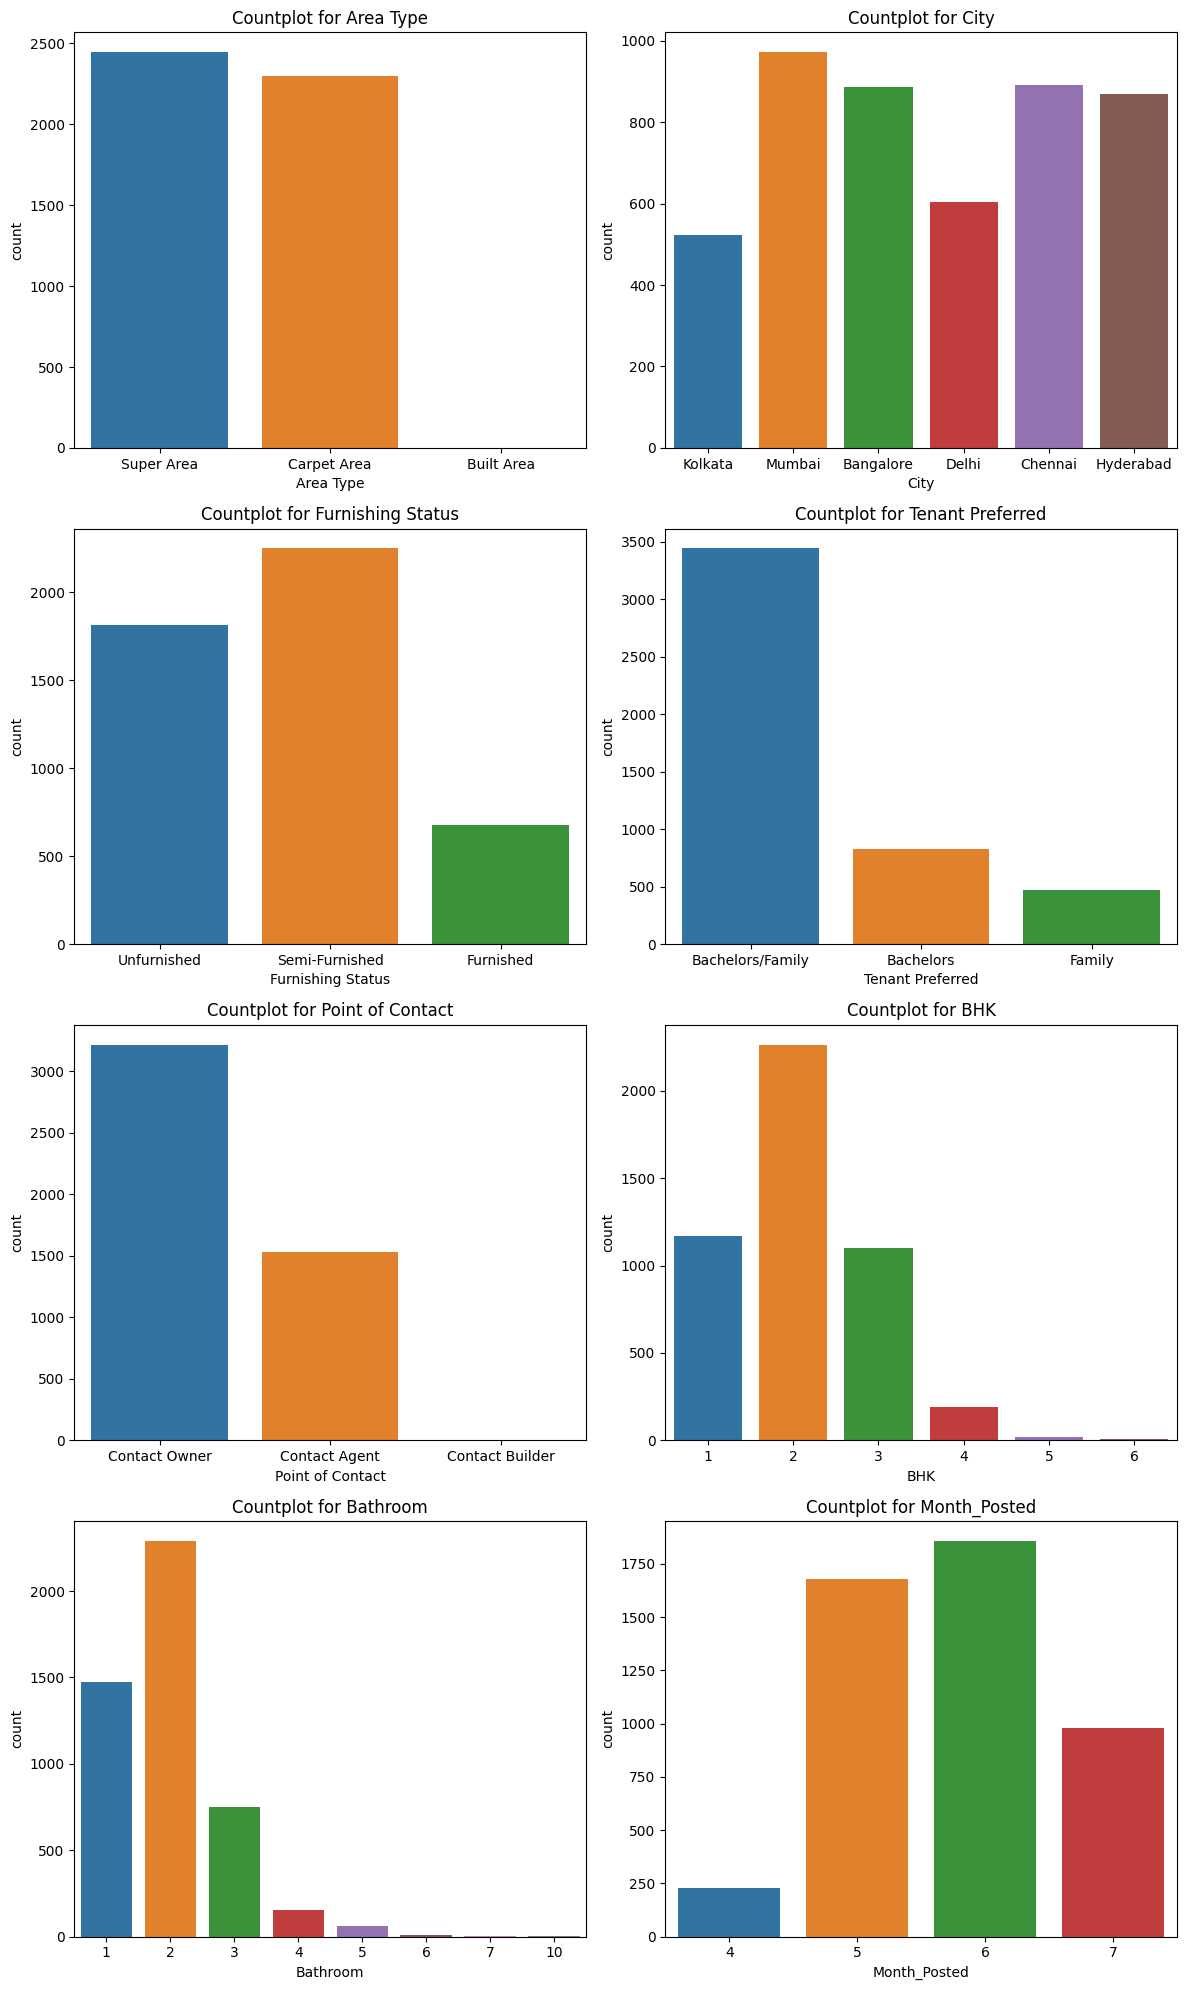

In [14]:
cols = ['Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact','BHK','Bathroom',
        'Month_Posted']

plt.figure(figsize=(12,20))
for i in range(len(cols)):  # range(8)=> i=0,1,2,...7
    plt.subplot(4,2,i+1)  # 4 = rows, 2 =cols
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [15]:
num_cols

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Bathroom', 'Year_Posted',
       'Month_Posted'],
      dtype='object')

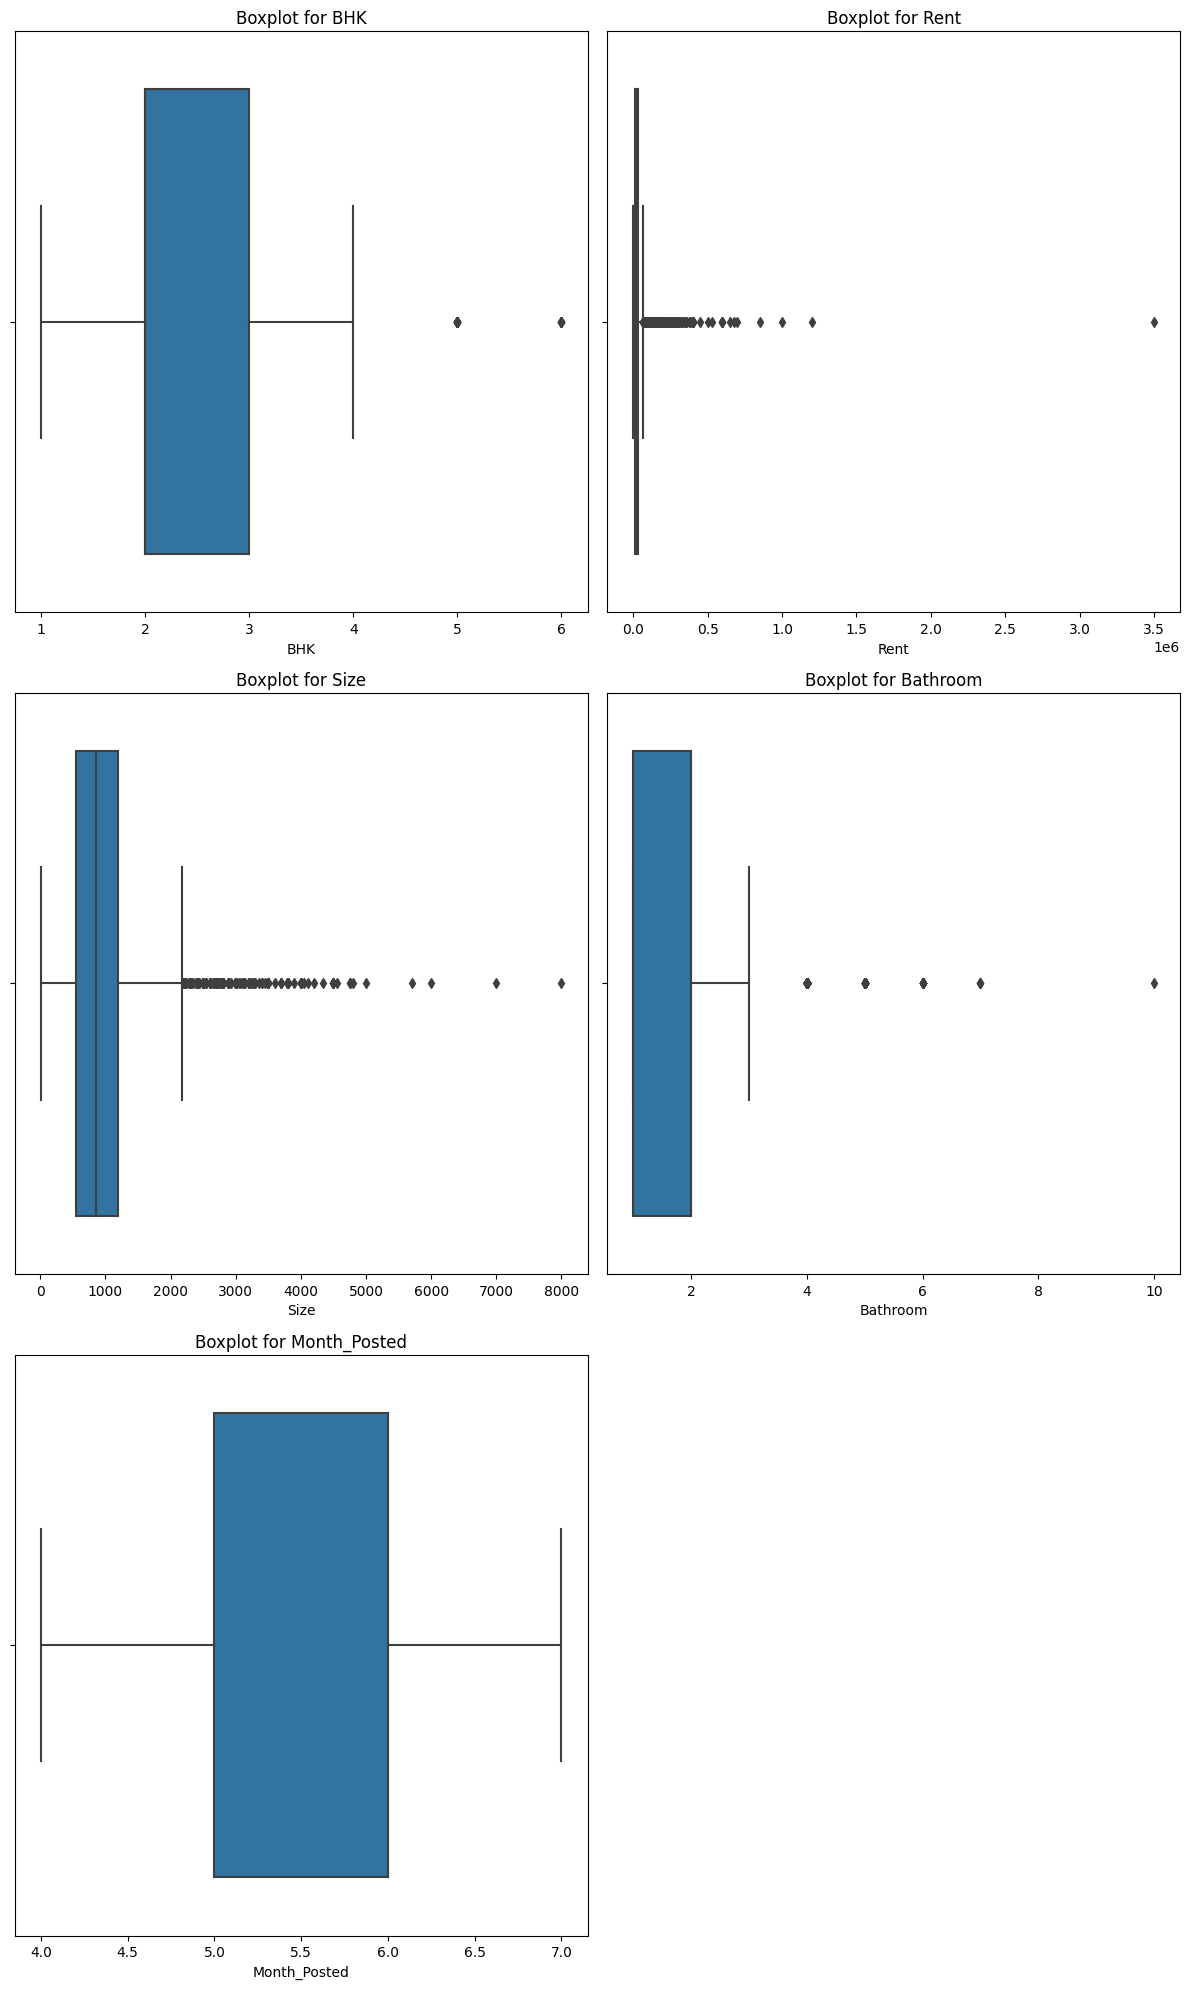

In [16]:
cols = ['BHK', 'Rent', 'Size', 'Bathroom','Month_Posted']

plt.figure(figsize=(12,20))
for i in range(len(cols)):   # range(8)=> i=0,1,2,...7
    plt.subplot(3,2,i+1)     # 4 = rows, 2 =cols
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

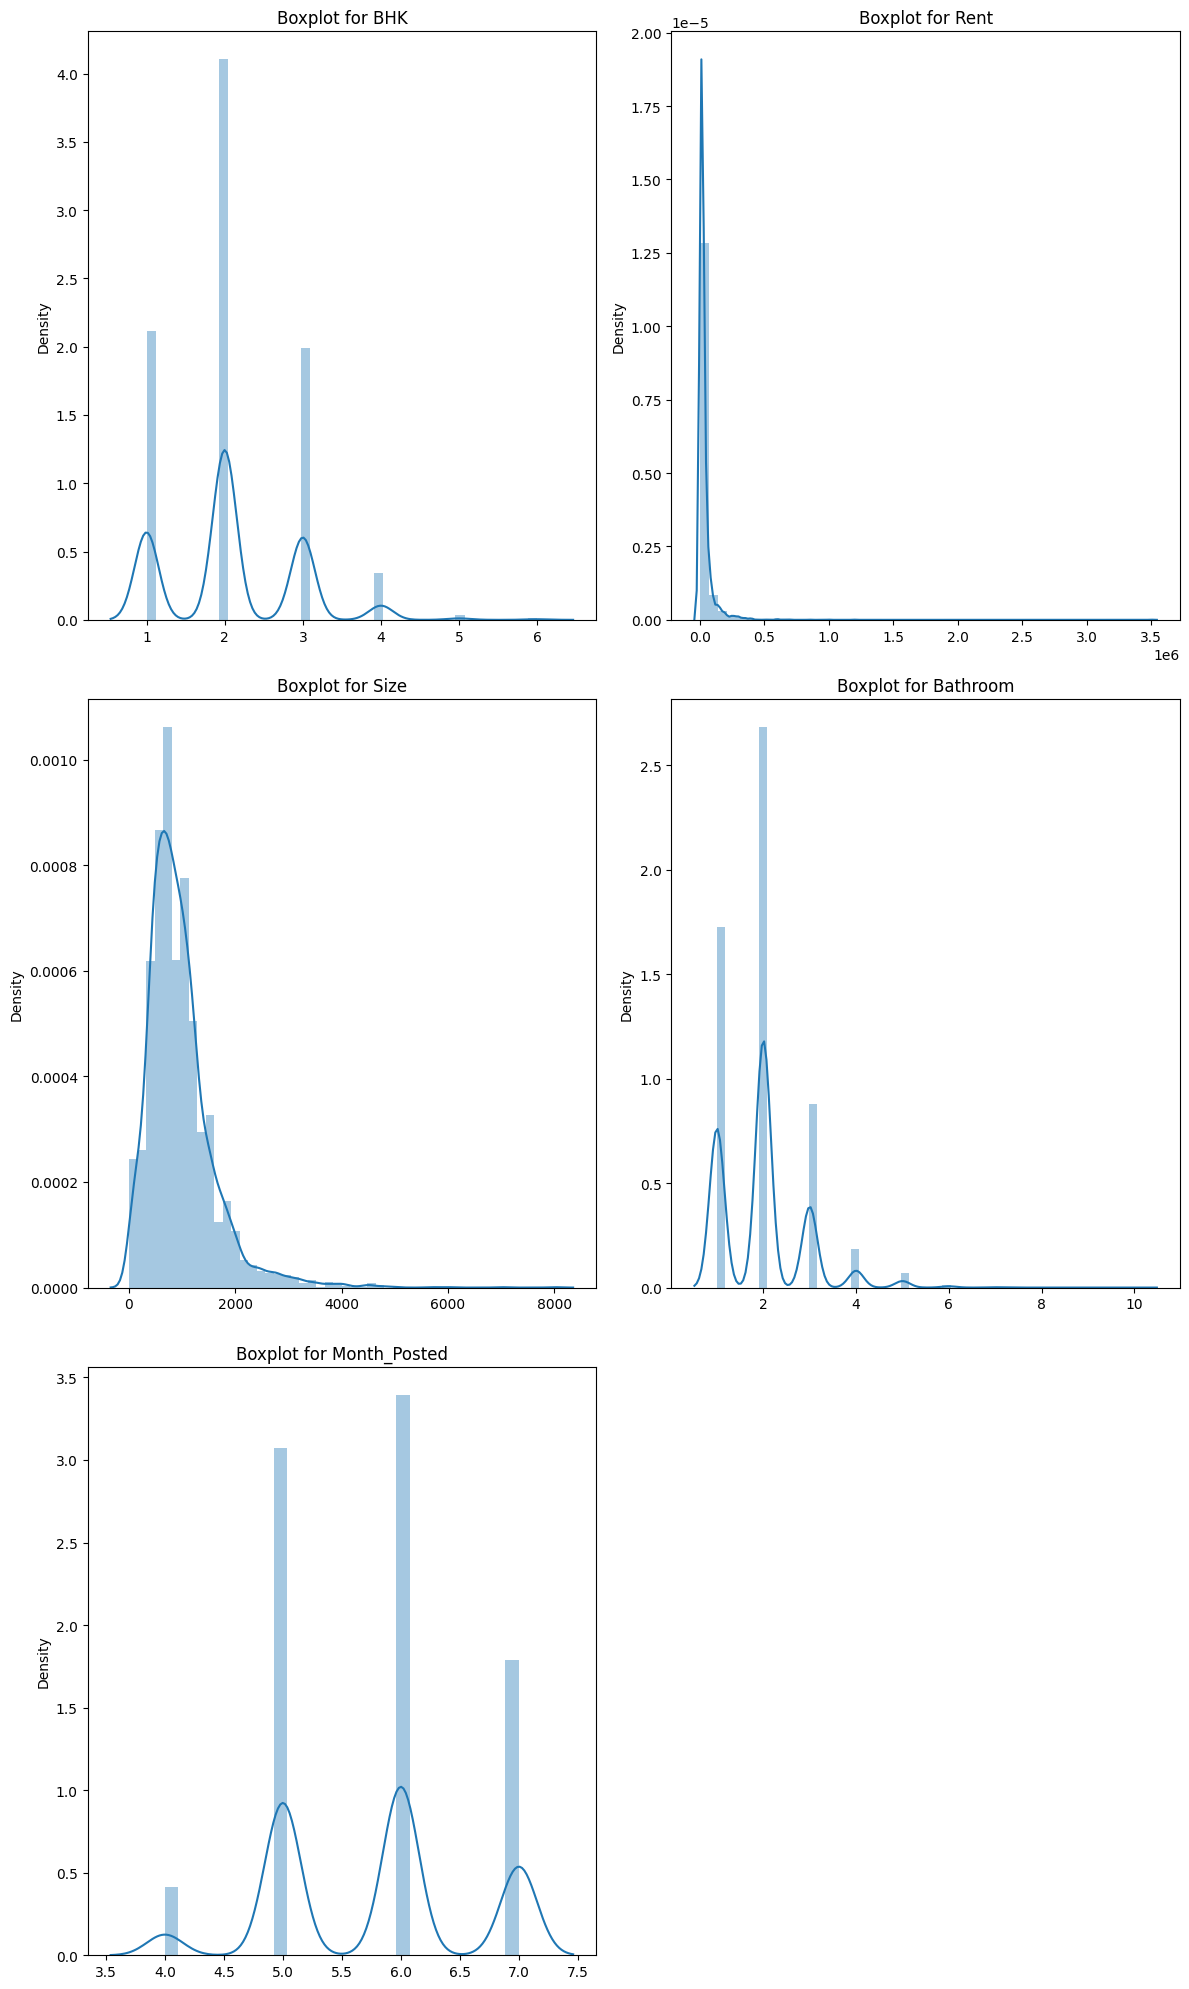

In [17]:
cols = ['BHK', 'Rent', 'Size', 'Bathroom','Month_Posted']

plt.figure(figsize=(12,20))
for i in range(len(cols)):   # range(8)=> i=0,1,2,...7
    plt.subplot(3,2,i+1)     # 4 = rows, 2 =cols
    sns.distplot(x=df[cols[i]],kde=True)
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [18]:
df.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                          int64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
Year_Posted                   int64
Month_Posted                  int64
dtype: object

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

In [20]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'Year_Posted', 'Month_Posted'],
      dtype='object')

In [21]:
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [22]:
# 'Upper Basement out of 5','Ground out of 27','Lower Basement out of 5'
# '15 out of 30', '1'

def extract_floor_level(x):
    if len(x)==1:
        res = x
    else:
        r = x.split()            # splits based on " " => returns a list
        res = " ".join(r[:2])
    return res

In [23]:
df['Floor_Level'] = df['Floor'].apply(extract_floor_level)
df['Floor_Level'].value_counts()

1 out             1159
2 out              945
Ground out         926
3 out              511
4 out              272
5 out              164
6 out               93
7 out               74
10 out              67
8 out               66
9 out               65
12 out              47
11 out              43
15 out              41
14 out              34
18 out              26
Upper Basement      23
17 out              22
16 out              21
19 out              16
13 out              15
20 out              12
25 out              12
Lower Basement      11
23 out               9
24 out               6
21 out               6
30 out               5
34 out               4
28 out               4
27 out               3
35 out               3
22 out               3
32 out               3
26 out               3
65 out               3
60 out               3
40 out               2
36 out               2
48 out               2
45 out               2
53 out               2
1                    2
44 out     

In [24]:
df['Floor_Level'] = df['Floor_Level'].str.replace(' out','')
df['Floor_Level'].value_counts()

1                 1161
2                  945
Ground             927
3                  512
4                  272
5                  164
6                   93
7                   74
10                  67
8                   66
9                   65
12                  47
11                  43
15                  41
14                  34
18                  26
Upper Basement      23
17                  22
16                  21
19                  16
13                  15
20                  12
25                  12
Lower Basement      11
23                   9
24                   6
21                   6
30                   5
34                   4
28                   4
35                   3
65                   3
22                   3
26                   3
32                   3
60                   3
27                   3
40                   2
53                   2
45                   2
36                   2
48                   2
29                   1
49         

In [25]:
df.shape

(4746, 15)

In [26]:
# Ground, Upper_basement,Lower_basement
df['Floor_Level'].replace({'Ground':0,'Lower Basement':0,
                         'Upper Basement':0},inplace=True)
df['Floor_Level'].value_counts()

1     1161
0      961
2      945
3      512
4      272
5      164
6       93
7       74
10      67
8       66
9       65
12      47
11      43
15      41
14      34
18      26
17      22
16      21
19      16
13      15
20      12
25      12
23       9
24       6
21       6
30       5
34       4
28       4
35       3
27       3
22       3
32       3
26       3
65       3
60       3
45       2
36       2
48       2
40       2
53       2
44       1
41       1
46       1
37       1
33       1
50       1
39       1
43       1
29       1
49       1
47       1
76       1
Name: Floor_Level, dtype: int64

In [27]:
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [28]:
def extract_floor_count(x):
    r = x.split()
    res = r[-1]
    return res

In [29]:
df['Floor_Count'] = df['Floor'].apply(extract_floor_count)
df['Floor_Count'].value_counts()

4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: Floor_Count, Length: 67, dtype: int64

In [30]:
df['Floor_Count'].replace({'Ground':1},inplace=True)
df['Floor_Count'].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34', 1],
      dtype=object)

In [31]:
df['Floor_Level'] = pd.to_numeric(df['Floor_Level'])
df['Floor_Count'] = pd.to_numeric(df['Floor_Count'])
df.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                          int64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
Year_Posted                   int64
Month_Posted                  int64
Floor_Level                   int64
Floor_Count                   int64
dtype: object

In [32]:
df['Year_Posted'].value_counts()

2022    4746
Name: Year_Posted, dtype: int64

In [33]:
df.drop(['Year_Posted','Floor'],axis=1,inplace=True)
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Area Type', 'Area Locality',
       'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact', 'Month_Posted', 'Floor_Level', 'Floor_Count'],
      dtype='object')

In [34]:
df.drop(['Posted On'],axis=1,inplace=True)
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Month_Posted', 'Floor_Level', 'Floor_Count'],
      dtype='object')

#### Correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_9084\839712883.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


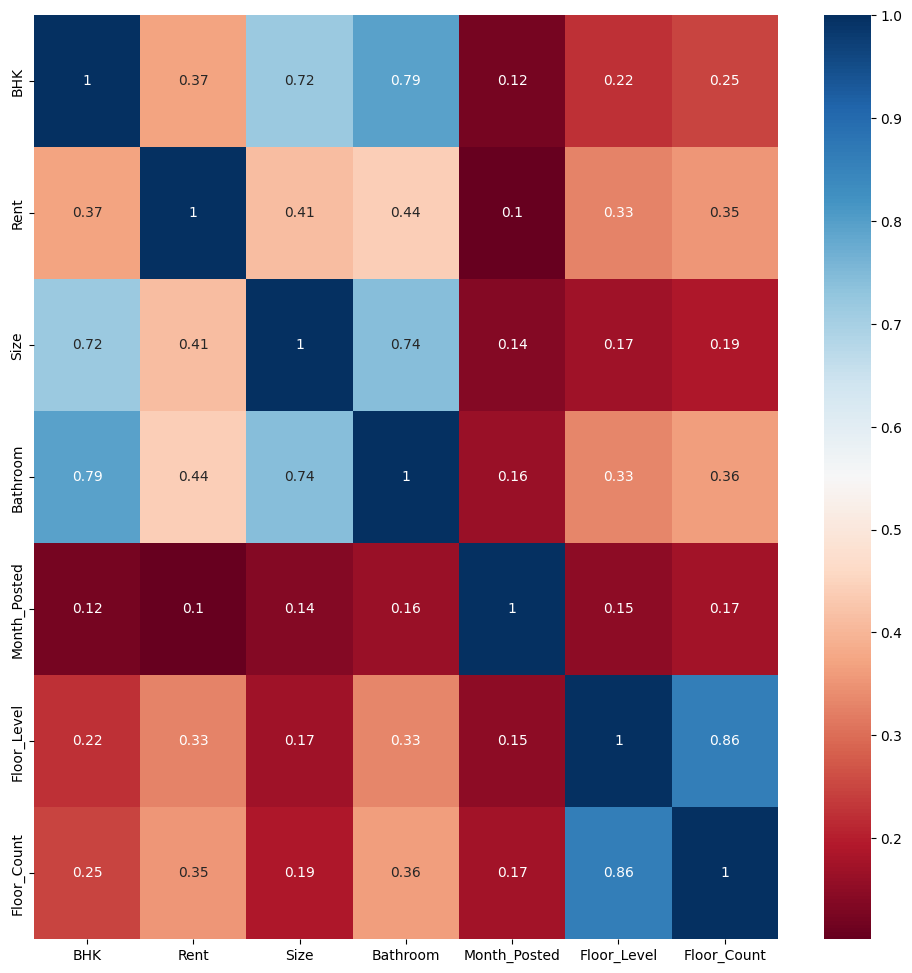

In [35]:
corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')  # annot= True => annotation
plt.show()

#### Extreme Outlier Treatment

In [36]:
# Q3 = 75%ile, Q1 = 25%ile
# Outliers > Q3 + 1.5*IQR or < Q1 - 1.5*IQR
a = df.describe(percentiles =[0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
BHK,1.0,1.0,1.0,1.00,2.0,4.00,4.0,4.0,6.0
Rent,1200.0,4000.0,5000.0,5000.00,16000.0,180000.00,211000.0,300000.0,3500000.0
Size,10.0,70.0,100.0,121.75,850.0,2500.00,2800.0,3289.2,8000.0
Bathroom,1.0,1.0,1.0,1.00,2.0,4.00,4.0,5.0,10.0
Month_Posted,4.0,4.0,4.0,4.00,6.0,7.00,7.0,7.0,7.0
Floor_Level,0.0,0.0,0.0,0.00,2.0,17.65,20.0,27.0,76.0
Floor_Count,1.0,1.0,1.0,1.00,4.0,31.00,37.0,51.0,89.0


In [37]:
print(df[df['Rent']<4000].shape)  # 
print(df[df['Rent']>300000.0].shape)  # 
print(df[df['Bathroom']>5.0].shape)  # 
print(df[df['Size']<70.0].shape)  # 
print(df[df['Size']>3289.0].shape)  # 
print(df[df['Floor_Count']>51.0].shape)  # 

(34, 13)
(41, 13)
(16, 13)
(47, 13)
(48, 13)
(47, 13)


In [38]:
df1 = df.copy()
df2 = df.copy()

In [39]:
df['Rent'] =  np.where(df['Rent']<4000.0, 4000.0,df['Rent'])
df['Size'] =  np.where(df['Size']<70, 70,df['Size'])

In [40]:
cols = ['Rent','Size','Bathroom','Floor_Count','Floor_Level']

def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
#    x = x.clip(lower=x.quantile(0.01))
    return x

In [41]:
df[cols] = df[cols].apply(outlier_treatment)

In [42]:
a = df.describe(percentiles = [0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
BHK,1.0,1.0,1.0,1.00,2.0,4.00,4.0,4.00,6.0
Rent,4000.0,4000.0,5000.0,5000.00,16000.0,180000.00,211000.0,300000.00,300000.0
Size,70.0,70.0,100.0,121.75,850.0,2500.00,2800.0,3283.26,3289.2
Bathroom,1.0,1.0,1.0,1.00,2.0,4.00,4.0,5.00,5.0
Month_Posted,4.0,4.0,4.0,4.00,6.0,7.00,7.0,7.00,7.0
Floor_Level,0.0,0.0,0.0,0.00,2.0,17.65,20.0,27.00,27.0
Floor_Count,1.0,1.0,1.0,1.00,4.0,31.00,37.0,51.00,51.0


In [43]:
df.dtypes

BHK                    int64
Rent                 float64
Size                 float64
Area Type             object
Area Locality         object
City                  object
Furnishing Status     object
Tenant Preferred      object
Bathroom               int64
Point of Contact      object
Month_Posted           int64
Floor_Level            int64
Floor_Count            int64
dtype: object

#### Encoding

In [44]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object')


In [45]:
for i in cat_cols:
    print(i,df[i].nunique())

Area Type 3
Area Locality 2235
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


In [46]:
# Prod  LabelEnc  PA  PB   PC  =>
# A        0      1   0   0
# B        1      0   1   0
# C        2      0   0   1
# A        0      1   0   0
# B        1      0   1   0

#  Dummy Variable Creation(returns dataframe) , One Hot Encoding(returns numpy array)

In [47]:
cols = ['Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact']
df_dum = pd.get_dummies(data=df,columns = cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(4746, 21)
Index(['BHK', 'Rent', 'Size', 'Area Locality', 'Bathroom', 'Month_Posted',
       'Floor_Level', 'Floor_Count', 'Area Type_Carpet Area',
       'Area Type_Super Area', 'City_Chennai', 'City_Delhi', 'City_Hyderabad',
       'City_Kolkata', 'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner'],
      dtype='object')


In [48]:
df_dum.dtypes

BHK                                    int64
Rent                                 float64
Size                                 float64
Area Locality                         object
Bathroom                               int64
Month_Posted                           int64
Floor_Level                            int64
Floor_Count                            int64
Area Type_Carpet Area                  uint8
Area Type_Super Area                   uint8
City_Chennai                           uint8
City_Delhi                             uint8
City_Hyderabad                         uint8
City_Kolkata                           uint8
City_Mumbai                            uint8
Furnishing Status_Semi-Furnished       uint8
Furnishing Status_Unfurnished          uint8
Tenant Preferred_Bachelors/Family      uint8
Tenant Preferred_Family                uint8
Point of Contact_Contact Builder       uint8
Point of Contact_Contact Owner         uint8
dtype: object

In [49]:
print(pd.__version__)

1.5.3


In [53]:
from scipy.stats import shapiro

In [54]:
test_stat,p = shapiro(df_dum['Rent'])
print(test_stat)
print(p)

0.5475691556930542
0.0


In [55]:
test_stat,p = shapiro(np.log(df_dum['Rent']))
print(test_stat)
print(p)   # => more close to 0.05

0.9468694925308228
2.3573553610873884e-38


#### Select x and y

In [59]:
x = df_dum.drop(['Rent','Area Locality','Month_Posted'],axis=1)
y = np.log(df_dum['Rent'])
print(x.shape)
print(y.shape)

(4746, 18)
(4746,)


#### VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Feature,VIF
0,BHK,25.680885
2,Bathroom,25.117086
6,Area Type_Super Area,18.705358
5,Area Type_Carpet Area,14.659457
1,Size,10.911050
4,Floor_Count,7.237012
17,Point of Contact_Contact Owner,6.442237
14,Tenant Preferred_Bachelors/Family,6.094707
3,Floor_Level,5.779480
12,Furnishing Status_Semi-Furnished,4.470250


#### Target variable is normally dist

In [60]:
from scipy.stats import shapiro
# Ho : Data is normally dist => p>0.05
# H1 : Data is not normally dist => p<=0.05

In [82]:
test_stat,p = shapiro(df_dum['Rent'])
print(test_stat)
print(p)

0.5475691556930542
0.0


In [94]:
test_stat,p = shapiro(np.log((df_dum['Rent'])))
print(test_stat)
print(p)

0.9468694925308228
2.3573553610873884e-38


#### Method to convert non-nomally dist data => normally dist data

In [95]:
from scipy.stats import boxcox

In [97]:
y_new,lamb = boxcox(df_dum['Rent'])
test_stat,p = shapiro(y_new)
print(test_stat)
print(p)

0.9907701015472412
4.7318499672903975e-17


### OLS Model - 1

In [61]:
x1 = x.copy()
y1 = y.copy()

In [62]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1206.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:48:22   Log-Likelihood:                -2252.7
No. Observations:                4746   AIC:                             4543.
Df Residuals:                    4727   BIC:                             4666.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 8.8587      0.277     31.929      0.000       8.315       9.403
BHK                                   0.1929      0.013     15.098      0.000       0.168       0.218
Size                                  0.0004   1.66e-05     26.901      0.000       0.000       0.000
Bathroom                              0.1746      0.013     13.190      0.000       0.149       0.201
Floor_Level                           0.0034      0.002      1.458      0.145      -0.001       0.008
Floor_Count                           0.0054      0.001      3.866      0.000       0.003       0.008
Area Type_Carpet Area                 0.1462      0.276      0.530      0.596      -0.395       0.688
Area Type_Super Area                  0.1072      0.276      0.388      0.698      -0.434       0.648
City_Chennai                         -0.0347      0.019     -1.845      0.065      -0.072       0.002
City_Delhi                            0.1936      0.022      8.982      0.000       0.151       0.236
City_Hyderabad                       -0.1499      0.019     -7.844      0.000      -0.187      -0.112
City_Kolkata                         -0.2710      0.023    -11.986      0.000      -0.315      -0.227
City_Mumbai                           0.8834      0.023     37.673      0.000       0.837       0.929
Furnishing Status_Semi-Furnished     -0.1893      0.017    -10.895      0.000      -0.223      -0.155
Furnishing Status_Unfurnished        -0.2852      0.018    -15.803      0.000      -0.321      -0.250
Tenant Preferred_Bachelors/Family    -0.0399      0.016     -2.429      0.015      -0.072      -0.008
Tenant Preferred_Family              -0.1148      0.023     -4.951      0.000      -0.160      -0.069
Point of Contact_Contact Builder     -0.4389      0.391     -1.124      0.261      -1.205       0.327
Point of Contact_Contact Owner       -0.3419      0.017    -19.561      0.000      -0.376      -0.308
==============================================================================
Omnibus:                      512.609   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2530.346
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       6.482   Cond. No.                     9.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
print('OLS_M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

OLS_M1
0.821143156689018
0.8204620855700001


#### Inference
1) Area Type_Carpet Area, Area Type_Super Area, Point of Contact - Super Area have high p-value

### OLS - M2

In [64]:
x2 = x.drop(['Area Type_Super Area'],axis=1)
y2 = y1.copy()

In [65]:
x2 = sm.add_constant(x2)
ols_m2 = sm.OLS(y2,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1277.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:49:58   Log-Likelihood:                -2252.8
No. Observations:                4746   AIC:                             4542.
Df Residuals:                    4728   BIC:                             4658.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 8.9656      0.034    261.628      0.000       8.898       9.033
BHK                                   0.1929      0.013     15.102      0.000       0.168       0.218
Size                                  0.0004   1.66e-05     26.903      0.000       0.000       0.000
Bathroom                              0.1746      0.013     13.191      0.000       0.149       0.201
Floor_Level                           0.0034      0.002      1.453      0.146      -0.001       0.008
Floor_Count                           0.0054      0.001      3.869      0.000       0.003       0.008
Area Type_Carpet Area                 0.0391      0.015      2.685      0.007       0.011       0.068
City_Chennai                         -0.0348      0.019     -1.852      0.064      -0.072       0.002
City_Delhi                            0.1936      0.022      8.983      0.000       0.151       0.236
City_Hyderabad                       -0.1500      0.019     -7.852      0.000      -0.187      -0.113
City_Kolkata                         -0.2709      0.023    -11.987      0.000      -0.315      -0.227
City_Mumbai                           0.8834      0.023     37.677      0.000       0.837       0.929
Furnishing Status_Semi-Furnished     -0.1891      0.017    -10.889      0.000      -0.223      -0.155
Furnishing Status_Unfurnished        -0.2851      0.018    -15.800      0.000      -0.320      -0.250
Tenant Preferred_Bachelors/Family    -0.0399      0.016     -2.431      0.015      -0.072      -0.008
Tenant Preferred_Family              -0.1148      0.023     -4.951      0.000      -0.160      -0.069
Point of Contact_Contact Builder     -0.4387      0.391     -1.123      0.261      -1.204       0.327
Point of Contact_Contact Owner       -0.3418      0.017    -19.562      0.000      -0.376      -0.308
==============================================================================
Omnibus:                      512.737   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2530.317
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       6.482   Cond. No.                     7.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
print('OLS_M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

print('OLS_M2')
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

OLS_M1
0.821143156689018
0.8204620855700001
OLS_M2
0.8211374485401325
0.8204943302290458


#### Split data into train and test

In [67]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3322, 18)
(1424, 18)
(3322,)
(1424,)


In [68]:
from sklearn.metrics import *

def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

### 1) Linear Regression

In [69]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)   # model is trained on training data

LinearRegression()

In [70]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 0.2953636724009048
MSE 0.15626587443246576
RMSE 0.39530478675632774
R2_Score 0.8152867776476598


In [73]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.8231255730025318
Test Score 0.8152867776476598


In [74]:
print(lr1.coef_)

[ 1.85839405e-01  4.75469492e-04  1.69692018e-01  1.90336538e-03
  5.84837712e-03  1.23984852e-01  9.01630397e-02 -3.94548200e-02
  1.94879045e-01 -1.48408540e-01 -2.68089676e-01  8.95447304e-01
 -2.08392468e-01 -3.03506165e-01 -1.83781298e-02 -9.66153177e-02
 -4.44560941e-01 -3.40092066e-01]


#### Overtting and Underfitting

1) Overfitting<br>
a) Model with high train score and comparatively low test score.<br>
b) Model with high variance and low bias.


2) Underfitting<br>
a) Model with high test score and comparatively low train score.<br>
b) Model with low variance and high bias.

Bias varaince TradeOff<br>
1) Bais and Variance are inversely proprotaional.

In [75]:
from sklearn.linear_model import Ridge, Lasso

In [76]:
rid1 = Ridge(alpha = 6.2)
rid1.fit(x_train,y_train)

Ridge(alpha=6.2)

In [77]:
print('LinReg')
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))
print('Ridge')
print('Train Score',rid1.score(x_train,y_train))
print('Test Score',rid1.score(x_test,y_test))

LinReg
Train Score 0.8231255730025318
Test Score 0.8152867776476598
Ridge
Train Score 0.823017822772634
Test Score 0.8154449413703038


In [78]:
print(lr1.coef_)
print(rid1.coef_)

[ 1.85839405e-01  4.75469492e-04  1.69692018e-01  1.90336538e-03
  5.84837712e-03  1.23984852e-01  9.01630397e-02 -3.94548200e-02
  1.94879045e-01 -1.48408540e-01 -2.68089676e-01  8.95447304e-01
 -2.08392468e-01 -3.03506165e-01 -1.83781298e-02 -9.66153177e-02
 -4.44560941e-01 -3.40092066e-01]
[ 1.83273339e-01  4.73255837e-04  1.72678315e-01  2.12423520e-03
  6.24976743e-03  2.71179772e-02 -1.04200994e-02 -4.48420381e-02
  1.87012895e-01 -1.53434188e-01 -2.68079812e-01  8.73158917e-01
 -2.03355883e-01 -2.97173046e-01 -1.60885238e-02 -9.13107823e-02
 -6.17721798e-02 -3.39213402e-01]


#### Lasso

In [85]:
lasso1 = Lasso(alpha = 0.0052)
lasso1.fit(x_train,y_train)

Lasso(alpha=0.0052)

In [86]:
print('LinReg')
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))
print('Ridge')
print('Train Score',rid1.score(x_train,y_train))
print('Test Score',rid1.score(x_test,y_test))
print('Lasso')
print('Train Score',lasso1.score(x_train,y_train))
print('Test Score',lasso1.score(x_test,y_test))

LinReg
Train Score 0.8231255730025318
Test Score 0.8152867776476598
Ridge
Train Score 0.823017822772634
Test Score 0.8154449413703038
Lasso
Train Score 0.8203721494098679
Test Score 0.8132356101643972


In [87]:
print(lasso1.coef_)

[ 1.63973490e-01  4.84491027e-04  1.74547800e-01  2.58539223e-03
  7.32249410e-03  2.48725187e-02 -0.00000000e+00 -0.00000000e+00
  1.93476482e-01 -1.00143579e-01 -1.87819643e-01  8.77271277e-01
 -1.26830849e-01 -2.26138216e-01  0.00000000e+00 -1.79876175e-02
 -0.00000000e+00 -3.39884384e-01]


#### Actual Prediction

In [88]:
ypred_act = np.exp(ypred_lr1)
ypred_act[:10]

array([ 8700.11798927, 34019.52228047, 15598.41997923, 25475.9655214 ,
       40759.49725822, 20660.10841294,  8877.83996635, 29958.38822372,
       22021.22106057, 26975.00292974])

In [89]:
ypred_lr1[:10]

array([ 9.07109187, 10.43468982,  9.6549249 , 10.14549076, 10.61544415,
        9.93595999,  9.09131356, 10.30756464,  9.99976186, 10.2026659 ])